### Initialization

In [1]:

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pickle
import matplotlib.ticker as ticker


### Figure rendering

/tmp/ipykernel_1655474/2325253932.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_yticklabels(ax[1].get_yticklabels(), ha='left', x=-0.08)


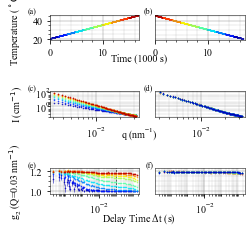

In [2]:
with open('checkpoint.pickle', 'rb') as f:
    avg_ramp_up = pickle.load(f)
    avg_ramp_down = pickle.load(f)
    t_el = pickle.load(f)
    ql_sta = pickle.load(f)
    ql_dyn = pickle.load(f)

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 8
plt.rcParams['figure.dpi'] = 600

# Calculate figure width to achieve 86 mm width
figure_width_mm = 86
figure_width_inches = figure_width_mm / 25.4  # Convert mm to inches
fig, ax = plt.subplots(3, 2, figsize=(figure_width_inches, figure_width_inches * 4.0 / 3.8))

def plot_one_column(ax, avg_data_list, second_column=False, g2_idx=0):
    total_size = 0
    for avg_dict in avg_data_list:
        total_size += len(avg_dict['temperature_x'])

    if second_column:
        cmap = plt.get_cmap('jet_r')
    else:
        cmap = plt.get_cmap('jet')
    
    accu_size = 0
    for avg_dict in avg_data_list:
        curr_size = len(avg_dict['temperature_x'])
        idx = accu_size + np.arange(curr_size) * 1.0
        idx /= total_size
        accu_size += curr_size

        ax[0].scatter(avg_dict['temperature_x'] * 6 / 1000, avg_dict['temperature'], 
                      c=cmap(np.ones_like(idx)*np.mean(idx)), s=0.5, linewidth = 0.5)

        color = cmap(np.mean(idx))
        for i in range(len(ql_sta[:-15])):
            if i % 3 == 0:  # Plot every third marker
                ax[1].loglog(ql_sta[i], avg_dict['saxs_1d'][i], 'o-', color=color, lw=0.5, ms=1, mew=0.5, mfc='none')
                
        ax[2].errorbar(t_el, avg_dict['g2'][:, g2_idx],  yerr=avg_dict['g2_err'][:, g2_idx],
                       fmt='o', color=color, lw=0.5, ms=1, mew=0.5, mfc='none')
        g2_line = avg_dict['g2'][:, g2_idx]

    ax[2].set_ylim(0.97, 1.23)
    
    ax[0].set_xlim(0, 16.9)
    ax[2].set_xscale('log')
    ax[1].set_ylim(0.033, 109)
    ax[1].set_xlim(2.7e-3, 3.5e-2)
    ax[2].set_xlim(0.000012,2.4)

    if not second_column:
        ax[0].set_ylabel('Temperature ($^\circ$C)', fontname="Times New Roman", labelpad = 11)
        ax[1].set_ylabel('I (cm$^{-1}$)', fontname="Times New Roman", labelpad = 10)
        ax[2].set_ylabel('$\mathdefault{g_2}$ (Q=0.03 nm$^{-1}$)', fontname="Times New Roman", labelpad = 7)
        plt.subplots_adjust(left=0.15)

        ax[0].set_xlabel('Time (1000 s)', fontname="Times New Roman")
        ax[1].set_xlabel('q ($\mathdefault{nm^{-1}}$)', fontname="Times New Roman")
        ax[2].set_xlabel('Delay Time $\mathdefault{\Delta t}$ (s)', fontname="Times New Roman")
        ax[0].xaxis.set_label_coords(1.0, -0.5)
        ax[1].xaxis.set_label_coords(1.0, -0.35)
        ax[2].xaxis.set_label_coords(1.0, -0.7)
        
        # Add gray grid lines and minor ticks 
        ax[0].grid(which='major', linestyle='-', linewidth='0.4', color='gray')
        ax[0].minorticks_on()
        ax[0].grid(which='minor', linestyle=':', linewidth='0.4', color='gray')
        
        ax[1].grid(which='major', linestyle='-', linewidth='0.4', color='gray')
        ax[1].minorticks_on()
        ax[1].grid(which='minor', linestyle=':', linewidth='0.4', color='gray')
        # Add minor y ticks to the second row images
        ax[1].yaxis.set_minor_locator(matplotlib.ticker.LogLocator(base=10, subs=np.arange(1, 5) *1, numticks=4))
        ax[1].tick_params(axis='y', which='minor', left=True, right=False, labelleft=False)
        ax[1].set_yticklabels(ax[1].get_yticklabels(), ha='left', x=-0.08)

        ax[2].grid(which='major', linestyle='-', linewidth='0.4', color='gray')
        ax[2].minorticks_on()
        ax[2].grid(which='minor', linestyle=':', linewidth='0.4', color='gray')
       
        ax[2].set_xscale('log')
        ax[2].xaxis.set_minor_locator(ticker.LogLocator(base=10, subs=np.arange(1, 10), numticks=100))

        ax[2].tick_params(axis='x', which='minor', labelbottom=False)

        plt.subplots_adjust(left=0.15, right=0.95, bottom=0.2, top=0.9)
        
        # Plot the black dashed line last to ensure it is on top
        ax[2].axvline(x=0.1, color='black', linestyle='--', linewidth=0.6)

    if second_column:
        ax[0].set_xlim(0, 16.9)
        ax[2].set_xlim(0.000012,2.4)
        ax[1].set_xlim(2.7e-3, 3.5e-2)
        ax[1].set_ylim(0.033, 109)
        
        # Add gray grid lines and minor ticks for the second column 
        ax[0].tick_params(axis='y', labelleft=False)
        ax[1].tick_params(axis='y', labelleft=False)
        ax[2].tick_params(axis='y', labelleft=False)

        ax[0].grid(which='major', linestyle='-', linewidth='0.4', color='gray')
        ax[0].minorticks_on()
        ax[0].grid(which='minor', linestyle=':', linewidth='0.4', color='gray')
        ax[0].tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

        ax[1].grid(which='major', linestyle='-', linewidth='0.4', color='gray')
        ax[1].minorticks_on()
        ax[1].grid(which='minor', linestyle=':', linewidth='0.4', color='gray')
        ax[1].yaxis.set_minor_locator(matplotlib.ticker.LogLocator(base=10, subs=np.arange(1, 5) * 1, numticks=4))

        ax[1].tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

        ax[2].grid(which='major', linestyle='-', linewidth='0.4', color='gray')
        ax[2].minorticks_on()
        ax[2].grid(which='minor', linestyle=':', linewidth='0.4', color='gray')
        ax[2].tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

        ax[2].set_xscale('log')
        ax[2].xaxis.set_minor_locator(ticker.LogLocator(base=10, subs=np.arange(1, 10), numticks=100))

        ax[2].tick_params(axis='x', which='minor', labelbottom=False)

# Adjusted w_pad for better layout
plt.tight_layout(w_pad=-1, h_pad=4.0)

plot_one_column(ax[:, 0], avg_ramp_up)
plot_one_column(ax[:, 1], avg_ramp_down, second_column=True)
for a in ax.flatten():
    a.spines['top'].set_linewidth(0.5)
    a.spines['right'].set_linewidth(0.5)
    a.spines['bottom'].set_linewidth(0.5)
    a.spines['left'].set_linewidth(0.5)
    
# Add labels (a) to (f)
ax[0, 0].text(-0.15, 1.3, '(a)', transform=ax[0, 0].transAxes, fontsize=8, va='top', ha='right')
ax[1, 0].text(-0.15, 1.3, '(c)', transform=ax[1, 0].transAxes, fontsize=8, va='top', ha='right')
ax[2, 0].text(-0.15, 1.3, '(e)', transform=ax[2, 0].transAxes, fontsize=8, va='top', ha='right')

ax[0, 1].text(-0.02, 1.3, '(b)', transform=ax[0, 1].transAxes, fontsize=8, va='top', ha='right')
ax[1, 1].text(-0.02, 1.3, '(d)', transform=ax[1, 1].transAxes, fontsize=8, va='top', ha='right')
ax[2, 1].text(-0.02, 1.3, '(f)', transform=ax[2, 1].transAxes, fontsize=8, va='top', ha='right')


plt.savefig('H02.pdf')

/tmp/ipykernel_1655474/3396426961.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_yticklabels(ax[1].get_yticklabels(), ha='left', x=-0.08)


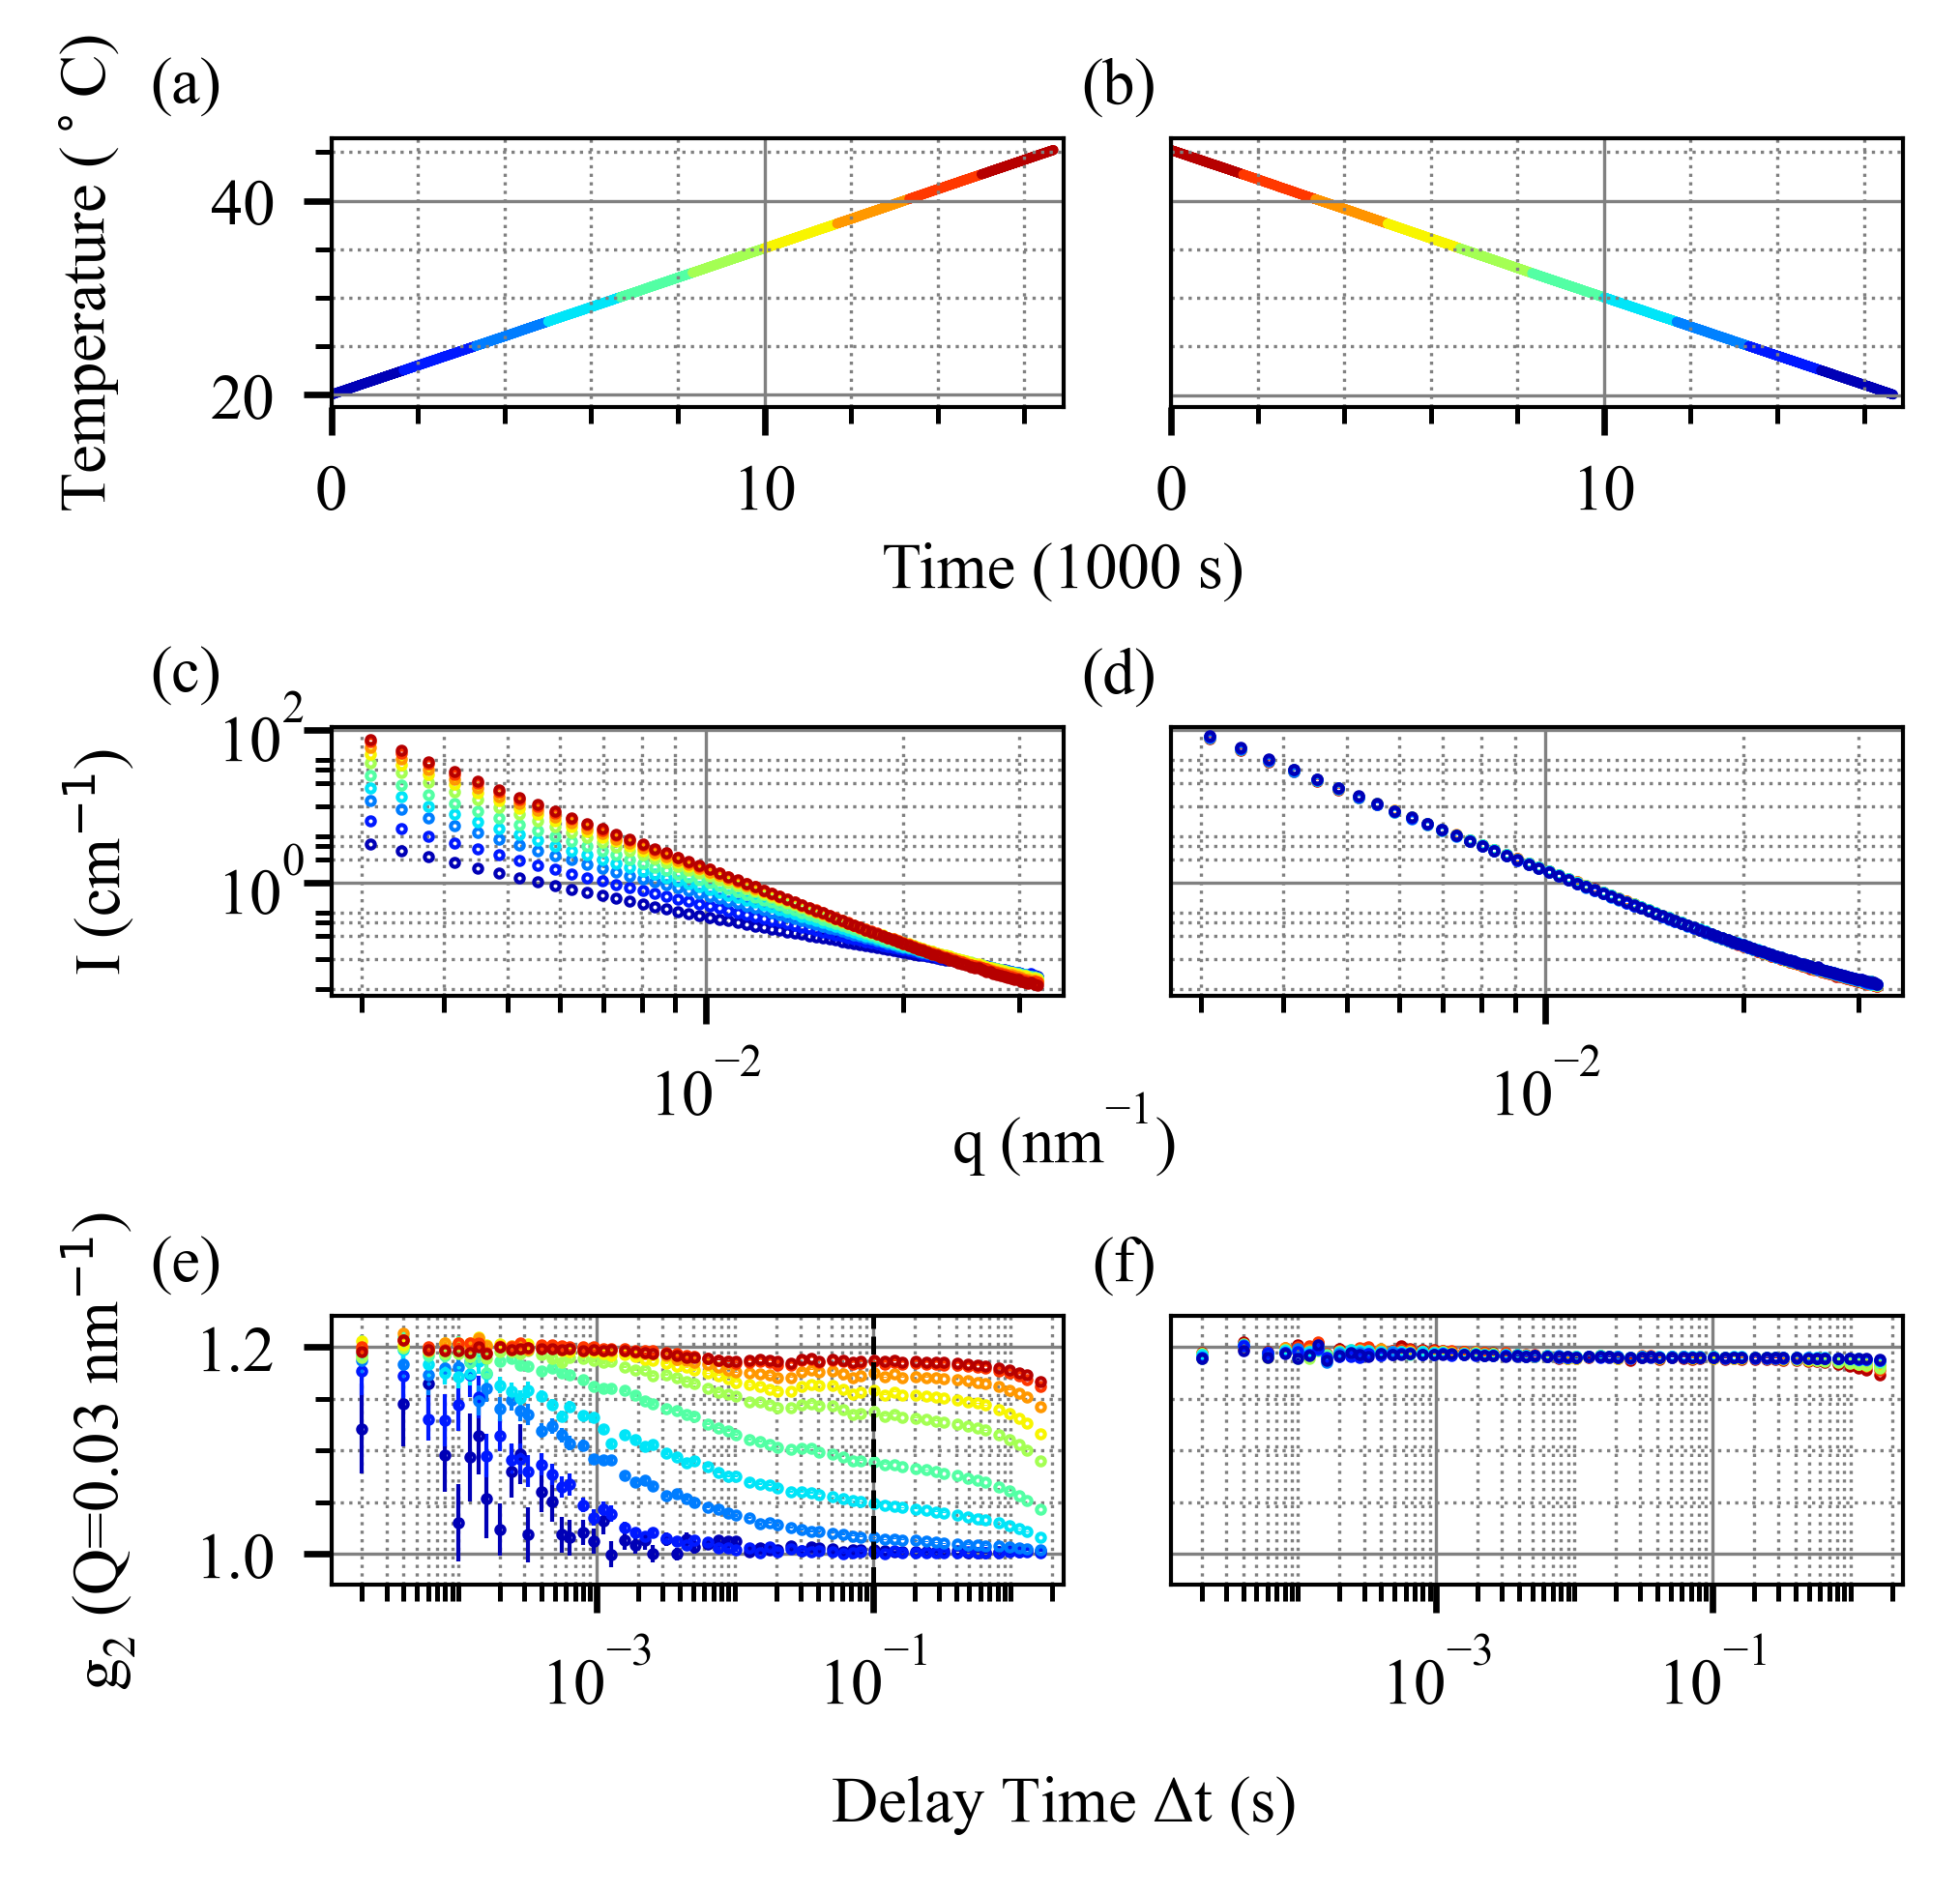

In [3]:
with open('checkpoint.pickle', 'rb') as f:
    avg_ramp_up = pickle.load(f)
    avg_ramp_down = pickle.load(f)
    t_el = pickle.load(f)
    ql_sta = pickle.load(f)
    ql_dyn = pickle.load(f)

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 8
plt.rcParams['figure.dpi'] = 600

# Calculate figure width to achieve 86 mm width
figure_width_mm = 86
figure_width_inches = figure_width_mm / 25.4  # Convert mm to inches
fig, ax = plt.subplots(3, 2, figsize=(figure_width_inches, figure_width_inches * 4.0 / 3.8))

def plot_one_column(ax, avg_data_list, second_column=False, g2_idx=0):
    total_size = 0
    for avg_dict in avg_data_list:
        total_size += len(avg_dict['temperature_x'])

    if second_column:
        cmap = plt.get_cmap('jet_r')
    else:
        cmap = plt.get_cmap('jet')
    
    accu_size = 0
    for avg_dict in avg_data_list:
        curr_size = len(avg_dict['temperature_x'])
        idx = accu_size + np.arange(curr_size) * 1.0
        idx /= total_size
        accu_size += curr_size

        ax[0].scatter(avg_dict['temperature_x'] * 6 / 1000, avg_dict['temperature'], 
                      c=cmap(np.ones_like(idx)*np.mean(idx)), s=0.5, linewidth = 0.5)

        color = cmap(np.mean(idx))
        for i in range(len(ql_sta[:-15])):
            if i % 3 == 0:  # Plot every third marker
                ax[1].loglog(ql_sta[i], avg_dict['saxs_1d'][i], 'o-', color=color, lw=0.5, ms=1, mew=0.5, mfc='none')
                
        ax[2].errorbar(t_el, avg_dict['g2'][:, g2_idx],  yerr=avg_dict['g2_err'][:, g2_idx],
                       fmt='o', color=color, lw=0.5, ms=1, mew=0.5, mfc='none')
        g2_line = avg_dict['g2'][:, g2_idx]

    ax[2].set_ylim(0.97, 1.23)
    
    ax[0].set_xlim(0, 16.9)
    ax[2].set_xscale('log')
    ax[1].set_ylim(0.033, 109)
    ax[1].set_xlim(2.7e-3, 3.5e-2)
    ax[2].set_xlim(0.000012, 2.4)

    if not second_column:
        ax[0].set_ylabel('Temperature ($^\circ$C)', fontname="Times New Roman", labelpad=11)
        ax[1].set_ylabel('I (cm$^{-1}$)', fontname="Times New Roman", labelpad=10)
        ax[2].set_ylabel('$\mathdefault{g_2}$ (Q=0.03 nm$^{-1}$)', fontname="Times New Roman", labelpad=7)
        plt.subplots_adjust(left=0.15)

        ax[0].set_xlabel('Time (1000 s)', fontname="Times New Roman")
        ax[1].set_xlabel('q ($\mathdefault{nm^{-1}}$)', fontname="Times New Roman")
        ax[2].set_xlabel('Delay Time $\mathdefault{\Delta t}$ (s)', fontname="Times New Roman")
        ax[0].xaxis.set_label_coords(1.0, -0.5)
        ax[1].xaxis.set_label_coords(1.0, -0.35)
        ax[2].xaxis.set_label_coords(1.0, -0.7)
        
        # Add gray grid lines and minor ticks 
        ax[0].grid(which='major', linestyle='-', linewidth='0.4', color='gray')
        ax[0].minorticks_on()
        ax[0].grid(which='minor', linestyle=':', linewidth='0.4', color='gray')
        
        ax[1].grid(which='major', linestyle='-', linewidth='0.4', color='gray')
        ax[1].minorticks_on()
        ax[1].grid(which='minor', linestyle=':', linewidth='0.4', color='gray')
        # Add minor y ticks to the second row images
        ax[1].yaxis.set_minor_locator(matplotlib.ticker.LogLocator(base=10, subs=np.arange(1, 5) * 1, numticks=4))
        ax[1].tick_params(axis='y', which='minor', left=True, right=False, labelleft=False)
        ax[1].set_yticklabels(ax[1].get_yticklabels(), ha='left', x=-0.08)

        ax[2].grid(which='major', linestyle='-', linewidth='0.4', color='gray')
        ax[2].minorticks_on()
        ax[2].grid(which='minor', linestyle=':', linewidth='0.4', color='gray')
       
        ax[2].set_xscale('log')
        ax[2].xaxis.set_minor_locator(ticker.LogLocator(base=10, subs=np.arange(1, 10), numticks=100))

        ax[2].tick_params(axis='x', which='minor', labelbottom=False)

        plt.subplots_adjust(left=0.15, right=0.95, bottom=0.2, top=0.9)
        
        # Plot the black dashed line last to ensure it is on top
        ax[2].axvline(x=0.1, color='black', linestyle='--', linewidth=0.6, zorder=10)

    if second_column:
        ax[0].set_xlim(0, 16.9)
        ax[2].set_xlim(0.000012, 2.4)
        ax[1].set_xlim(2.7e-3, 3.5e-2)
        ax[1].set_ylim(0.033, 109)
        
        # Add gray grid lines and minor ticks for the second column 
        ax[0].tick_params(axis='y', labelleft=False)
        ax[1].tick_params(axis='y', labelleft=False)
        ax[2].tick_params(axis='y', labelleft=False)

        ax[0].grid(which='major', linestyle='-', linewidth='0.4', color='gray')
        ax[0].minorticks_on()
        ax[0].grid(which='minor', linestyle=':', linewidth='0.4', color='gray')
        ax[0].tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

        ax[1].grid(which='major', linestyle='-', linewidth='0.4', color='gray')
        ax[1].minorticks_on()
        ax[1].grid(which='minor', linestyle=':', linewidth='0.4', color='gray')
        ax[1].yaxis.set_minor_locator(matplotlib.ticker.LogLocator(base=10, subs=np.arange(1, 5) * 1, numticks=4))

        ax[1].tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

        ax[2].grid(which='major', linestyle='-', linewidth='0.4', color='gray')
        ax[2].minorticks_on()
        ax[2].grid(which='minor', linestyle=':', linewidth='0.4', color='gray')
        ax[2].tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

        ax[2].set_xscale('log')
        ax[2].xaxis.set_minor_locator(ticker.LogLocator(base=10, subs=np.arange(1, 10), numticks=100))

        ax[2].tick_params(axis='x', which='minor', labelbottom=False)

# Adjusted w_pad for better layout
plt.tight_layout(w_pad=-1, h_pad=4.0)

plot_one_column(ax[:, 0], avg_ramp_up)
plot_one_column(ax[:, 1], avg_ramp_down, second_column=True)
for a in ax.flatten():
    a.spines['top'].set_linewidth(0.5)
    a.spines['right'].set_linewidth(0.5)
    a.spines['bottom'].set_linewidth(0.5)
    a.spines['left'].set_linewidth(0.5)
    
# Add labels (a) to (f)
ax[0, 0].text(-0.15, 1.3, '(a)', transform=ax[0, 0].transAxes, fontsize=8, va='top', ha='right')
ax[1, 0].text(-0.15, 1.3, '(c)', transform=ax[1, 0].transAxes, fontsize=8, va='top', ha='right')
ax[2, 0].text(-0.15, 1.3, '(e)', transform=ax[2, 0].transAxes, fontsize=8, va='top', ha='right')

ax[0, 1].text(-0.02, 1.3, '(b)', transform=ax[0, 1].transAxes, fontsize=8, va='top', ha='right')
ax[1, 1].text(-0.02, 1.3, '(d)', transform=ax[1, 1].transAxes, fontsize=8, va='top', ha='right')
ax[2, 1].text(-0.02, 1.3, '(f)', transform=ax[2, 1].transAxes, fontsize=8, va='top', ha='right')

plt.savefig('H02.pdf')